In [65]:
# Importing all necessary libraries required for this coursework

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import zscore
from sklearn.metrics import accuracy_score

!pip install --upgrade spacy

In [66]:
data = pd.read_csv('comp1804_coursework_dataset_23-24.csv')
data

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
0,428209002237,Ramsay was born in Glasgow on 2 October 1852. ...,ORG_YES_PRODUCT_NO_PERSON_YES_,49,12.0,man,biographies,clear_enough
1,564218010072,It has been widely estimated for at least the ...,ORG_YES_PRODUCT_NO_PERSON_NO_,166,47.0,man,artificial intelligence,not_clear_enough
2,291401001672,He went on to win the Royal Medal of the Royal...,ORG_YES_PRODUCT_NO_PERSON_NO_,69,18.0,non-binary,biographies,clear_enough
3,31548004883,The changes have altered many underlying assum...,ORG_NO_PRODUCT_YES_PERSON_NO_,76,27.0,non-binary,programming,clear_enough
4,50634005146,"After these novels were published, Disraeli de...",ORG_YES_PRODUCT_YES_PERSON_YES_,200,47.0,man,biographies,not_clear_enough
...,...,...,...,...,...,...,...,...
9342,200523007578,Sir Joseph Dalton Hooker was a British botani...,ORG_YES_PRODUCT_NO_PERSON_YES_,54,16.0,man,biographies,NaN
9343,50634005203,As successful invasions of India generally cam...,ORG_YES_PRODUCT_NO_PERSON_YES_,217,46.0,woman,biographies,NaN
9344,6437003939,Hawking was born on 8 January 1942 in Oxford t...,ORG_YES_PRODUCT_NO_PERSON_YES_,91,27.0,woman,biographies,NaN
9345,725259002815,More complex tasks can be making custom data e...,ORG_YES_PRODUCT_NO_PERSON_NO_,47,15.0,man,programming,NaN


# Statistics Summary


In [67]:
data.describe()

,par_id,lexicon_count,difficult_words
count,9.347000e+03,9347.000000,9329.000000
mean,3.568369e+11,81.981277,21.514203
std,3.221399e+11,63.533532,16.307358
min,8.500328e+07,0.000000,0.000000
25%,7.019601e+10,33.000000,9.000000
50%,2.684380e+11,64.000000,17.000000
75%,6.124310e+11,117.000000,30.000000
max,1.058779e+12,653.000000,143.000000


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9347 entries, 0 to 9346
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   par_id              9347 non-null   int64  
 1   paragraph           9347 non-null   object 
 2   has_entity          9347 non-null   object 
 3   lexicon_count       9347 non-null   int64  
 4   difficult_words     9329 non-null   float64
 5   last_editor_gender  9347 non-null   object 
 6   category            9286 non-null   object 
 7   text_clarity        9 non-null      object 
dtypes: float64(1), int64(2), object(5)
memory usage: 584.3+ KB


In [69]:
data.shape

(9347, 8)

In [70]:
data.ndim

2

In [71]:
data.columns

Index(['par_id', 'paragraph', 'has_entity', 'lexicon_count', 'difficult_words',
       'last_editor_gender', 'category', 'text_clarity'],
      dtype='object')

# Handling and Imputing missing values

In [72]:
## Checking for missing values in the target variable - we find there are 61 missing values
data.isnull().sum()

par_id                   0
paragraph                0
has_entity               0
lexicon_count            0
difficult_words         18
last_editor_gender       0
category                61
text_clarity          9338
dtype: int64

In [73]:
# Imputing the 61 missing values found in the target variable
category_mode = data['category'].mode()[0]
data['category'].fillna(category_mode, inplace=True)

In [74]:
# Validating that there are no missing values anymore in our target variable
data.isnull().sum()

par_id                   0
paragraph                0
has_entity               0
lexicon_count            0
difficult_words         18
last_editor_gender       0
category                 0
text_clarity          9338
dtype: int64

# Checking and dropping duplicates

In [75]:
# Printing duplicate rows in the input parameter - 'paragraph'
data['paragraph']=data['paragraph'].str.lower()
clean_data = data.drop_duplicates(subset=['paragraph'])
print("Cleaned Dataset:")
print(clean_data.shape)

Cleaned Dataset:
(8992, 8)


In [76]:
# Printing duplicate rows in the input parameter - 'has_entity'
data['has_entity']=data['has_entity'].str.lower()
clean_data = data.drop_duplicates(subset=['has_entity'])
print("Cleaned Dataset:")
print(clean_data.shape)

Cleaned Dataset:
(9, 8)


In [77]:
# Printing duplicate rows in the target variable
data['category']=data['category'].str.lower()
clean_data = data.drop_duplicates(subset=['category'])
print('Duplicated Rows in Output Feature are:')
print(clean_data.shape)

Duplicated Rows in Output Feature are:
(5, 8)


# Exploratory Data Analysis

<Axes: title={'center': 'Distribution of Target Variable'}, ylabel='Count'>

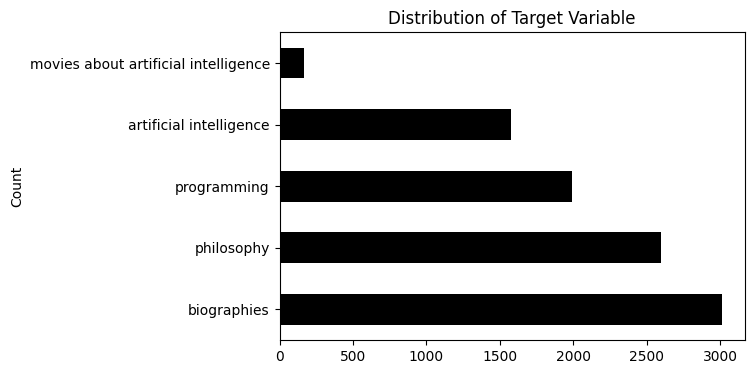

In [78]:
plt.figure(figsize=(6,4))
plt.title('Distribution of Target Variable')
plt.xlabel('Category')
plt.ylabel('Count')
data['category'].value_counts().plot(kind='barh', color='black')

<Axes: title={'center': 'Distribution of Target Variable'}, ylabel='Count'>

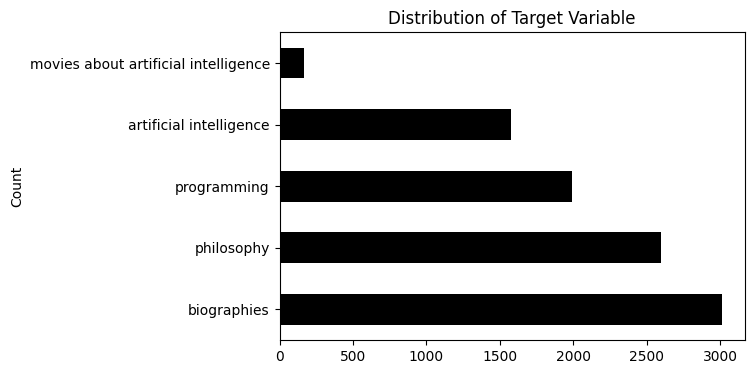

In [79]:
# Removing parameters with 0 counts/values
plt.figure(figsize=(6,4))
data['category']=data['category'].str.lower()
plt.title('Distribution of Target Variable')
plt.xlabel('Category')
plt.ylabel('Count')
data['category'].value_counts().plot(kind='barh', color='black')

# Reading and Splitting data

In [80]:
# Selecting the features and target variable
X = data[['has_entity', 'paragraph']]
Y = data[['category']]

In [81]:
print(X.isna().sum())
print(Y.isna().sum())
print(Y.value_counts())

has_entity    0
paragraph     0
dtype: int64
category    0
dtype: int64
category                            
biographies                             3016
philosophy                              2598
programming                             1990
artificial intelligence                 1576
movies about artificial intelligence     167
dtype: int64


In [82]:
# Splitting data in the ratio 80:20% for training and testing
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

In [83]:
print(train_X.value_counts())

has_entity                       paragraph                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
org_no_product_no_person_no_     -1                                                                                                                                              

In [84]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)
print()
print(train_X.head(10))

(7477, 2)
(1870, 2)
(7477, 1)
(1870, 1)

                          has_entity  \
6443   org_yes_product_no_person_no_   
5846  org_yes_product_no_person_yes_   
7104   org_yes_product_no_person_no_   
251   org_yes_product_no_person_yes_   
8606   org_no_product_no_person_yes_   
7698   org_yes_product_no_person_no_   
8500  org_yes_product_no_person_yes_   
7700  org_yes_product_no_person_yes_   
7458  org_yes_product_no_person_yes_   
4202  org_yes_product_no_person_yes_   

                                              paragraph  
6443  extension of the bank to the north-west, the e...  
5846  thomson's separation of neon isotopes by their...  
7104  the python license was an open-source, gpl-com...  
251    now let's be clear before we go any further t...  
8606  a general system of botany, descriptive and an...  
7698  the bahaʼi faith asserts that evil is non-exis...  
8500  in august 1993, it was discovered that the pro...  
7700  roko's basilisk has gained a significant amoun..

In [85]:
print(train_X.value_counts())

has_entity                       paragraph                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
org_no_product_no_person_no_     -1                                                                                                                                              

# Encoding the categorical data

In [86]:
# Using Label Encoder for encoding the categorical data
label_encoder = LabelEncoder()
train_Y_encoded = label_encoder.fit_transform(train_Y)
test_Y_encoded = label_encoder.transform(test_Y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [87]:
## Text Vectorization
vectorizer = TfidfVectorizer()
train_X_vector = vectorizer.fit_transform(train_X['paragraph'])
test_X_vector = vectorizer.transform(test_X['paragraph'])

In [88]:
## Using logistic regression machine learning algorithm

# Setting up the Logistic Regression Classifier
logistic_regression = LogisticRegression(random_state=42)

# Training the Model
logistic_regression.fit(train_X_vector, train_Y)

# Making Predictions with Logistic Regression
pred_Y_logistic = logistic_regression.predict(test_X_vector)

# Displaying Accuracy
accuracy_logistic = accuracy_score(test_Y, pred_Y_logistic)
print(f'Accuracy with Logistic Regression: {accuracy_logistic:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy with Logistic Regression: 0.92


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Confusion Matrix

In [89]:
# Computing Confusion Matrix
con_matrix = confusion_matrix(test_Y, pred_Y_logistic)

# Displaying Confusion Matrix
print("Confusion Matrix:")
print(con_matrix)

Confusion Matrix:
[[290  10   0  22  13]
 [  3 533   0  37   3]
 [  1  11  23   2   1]
 [  5  17   0 485   6]
 [  6   7   0   6 389]]
